In [195]:
from pathlib import Path
import re

import pandas as pd; pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

We read the tables into a single csv, adding a column for the simulation ID.

In [196]:
pattern = r".*_i(\d{2})_ccdvisitid(\d+)_ra(\d{2}d\d{3})_dec(m\d{2}d\d{3})_mag(\d{2}d\d{1}).csv"
results_directory_path = Path("data/08_anomalies/")
results_filepath = [fp for fp in results_directory_path.iterdir()]
tables_infos = [
    (
        int(match.groups()[0]), # simulation id
        int(match.groups()[1]), # visit id
        float(match.groups()[2].replace("d", ".")), # ra
        float(match.groups()[3].replace("d", ".").replace("m", "-")), # dec
        float(match.groups()[4].replace("d", ".")), # mag
        fp,
    ) 
    for fp in results_filepath if (match := re.match(pattern, str(fp)))
]

In [198]:
results_df = pd.concat(
    [pd.concat(
        (
            pd.DataFrame({
                "id": [sim_id] * len(_df := pd.read_csv(path, index_col=0)),
                "visit_id": [visit_id] * len(_df),
            }),
            _df,
        ),
        axis = 1,
    )
    for sim_id, visit_id, ra, dec, mag, path in tables_infos],
    axis = 0
)

The table column and head is:

In [199]:
results_df.columns

Index(['id', 'visit_id', 'coord_ra', 'coord_dec', 'PsfFlux_base',
       'PsfFlux_baseErr', 'PsfFlux_diffim', 'PsfFlux_diffimErr', 'snr_diffim',
       'snr_base', 'mag_base', 'mag_base_errBot', 'mag_base_errTop',
       'mag_diffim', 'mag_diffim_errBot', 'mag_diffim_errTop', 'is_negative',
       'ann_donut', 'ann_mask_detected_negative', 'ann_mask_crosstalk',
       'ann_mask_intrp', 'ann_mask_sat', 'ann_mask_detected',
       'ann_mask_injected', 'ann_closestar', 'ann_extoverlap',
       'ann_mask_injected_core', 'ann_mask_cr', 'ann_mask_no_data',
       'ann_mask_streak'],
      dtype='object')

In [200]:
results_df

,id,visit_id,coord_ra,coord_dec,PsfFlux_base,PsfFlux_baseErr,PsfFlux_diffim,PsfFlux_diffimErr,snr_diffim,snr_base,mag_base,mag_base_errBot,mag_base_errTop,mag_diffim,mag_diffim_errBot,mag_diffim_errTop,is_negative,ann_donut,ann_mask_detected_negative,ann_mask_crosstalk,ann_mask_intrp,ann_mask_sat,ann_mask_detected,ann_mask_injected,ann_closestar,ann_extoverlap,ann_mask_injected_core,ann_mask_cr,ann_mask_no_data,ann_mask_streak
0,0,447510138,68.084053,-40.670261,136711.937329,2230.404034,2.310636e+06,2229.755849,1036.273303,61.294696,19.322040,-0.017570,0.017859,16.252227,-0.001047,0.001048,False,False,False,False,False,False,True,False,False,True,NaN,NaN,NaN,NaN
1,0,447510138,68.227977,-40.631725,94903.635200,2137.736642,2.118657e+06,2136.060756,991.852234,44.394447,19.718349,-0.024185,0.024736,16.346404,-0.001094,0.001095,False,False,False,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN
2,0,447510138,68.202721,-40.497279,41399.743204,1214.292002,7.314986e+05,1210.529432,604.279922,34.093730,20.619062,-0.031388,0.032322,17.501022,-0.001795,0.001798,False,False,True,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN
3,0,447510138,67.950135,-40.602286,12041.989290,376.837947,2.341678e+04,379.483207,61.707035,31.955352,21.959810,-0.033456,0.034520,21.237738,-0.017454,0.017739,False,False,False,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN
4,0,447510138,68.197259,-40.583937,25118.970596,1318.611193,8.922377e+05,1316.477513,677.746263,19.049566,21.161551,-0.055550,0.058546,17.285354,-0.001601,0.001603,False,False,True,True,False,False,True,False,False,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,33,1192944066,67.466265,-40.772454,-2528.122835,483.450658,7.534176e+04,480.751201,156.716733,-5.229330,NaN,0.230436,-0.189988,19.974042,-0.006906,0.006950,True,True,True,False,False,False,False,False,False,False,False,NaN,NaN,False
416,33,1192944066,67.419172,-40.746141,-4513.316258,848.394288,2.950009e+05,842.224298,350.264099,-5.319833,NaN,0.226078,-0.187019,18.492073,-0.003095,0.003104,True,True,True,False,False,False,False,False,False,False,False,NaN,NaN,False
417,33,1192944066,67.545084,-40.814835,-5433.109412,923.262519,4.752641e+05,917.933642,517.754292,-5.884685,NaN,0.202217,-0.170402,17.974294,-0.002095,0.002099,True,True,True,False,False,False,False,False,False,True,False,NaN,NaN,False
418,33,1192944066,67.533275,-40.788138,-8530.962579,1252.326837,8.933697e+05,1243.964833,718.163155,-6.812090,NaN,0.172370,-0.148717,17.289054,-0.001511,0.001513,True,True,True,False,False,False,False,False,False,True,False,NaN,NaN,False


We also load the table with the truth used in the transients simulations.

In [201]:
truth_df = pd.read_csv("data/06_sourceCatalogSim/afterglow_host.csv")

In [202]:
truth_df.head()

,ra,dec,m,M,pop,ts_ra,ts_dec,ts_mag_r,ts_idtruth,ts_redshift,ts_flux_r,angsep_arcsec,theta_deg
0,68.037678,-40.553967,23.835787,-18.395345,1.0,68.036669,-40.555018,28.544201,9812960928_1,0.517230,13.878000,4.684264,36.105819
1,58.451601,-32.905878,19.820295,-19.351278,1.0,58.451572,-32.906114,25.807301,5000026223_1,0.157696,172.608994,0.853347,5.914667
2,55.452187,-37.742112,22.117489,-20.819032,1.0,55.452444,-37.742541,28.719500,7813193635_1,0.597980,11.808800,1.711400,334.630554
3,67.610596,-38.583648,21.795481,-20.957741,1.0,67.610699,-38.583603,27.466700,9000586006_1,0.570496,37.438099,0.332736,241.169957
4,56.255100,-39.846234,24.404574,-18.569928,1.0,56.256146,-39.846415,24.171101,9563515687_1,0.704722,779.044983,2.964166,282.655048


# Analysis

## How many transients did we detect?


First we count how many positives (both true and false) we got.

In [203]:
print(f"We found {len(results_df)} positives over {len(results_df["id"].unique())} simulations at 4 sigma threshold level")

We found 13469 positives over 34 simulations at 4 sigma threshold level


It is worthy to also count positives over 5 sigma.

In [204]:
NIDs = len(results_df["id"].unique())

In [205]:
print(f"We found {len(results_df[results_df['snr_base'] > 5])} positives over {NIDs} simulations at 5 sigma threshold level")

We found 535 positives over 34 simulations at 5 sigma threshold level


Comparing with the number of simulated transients we get the number of true positives, false positives and false negative.

In [206]:
ndetected = 0
for i in results_df["id"].unique():
    _df = results_df[results_df["id"] == i]
    if _df["ann_mask_injected"].any():
        ndetected += 1

In [207]:
print(f"The number of true positives is {ndetected}.")
print(f"We had {NIDs - ndetected} false negatives.")
print(f"The fraction of detected transients is {100 * ndetected / len(_n := results_df['id'].unique()):.2f} % ({ndetected} / {len(_n)}).")
print(f"The number of false positives is {len(results_df) - ndetected} at 4sigma, or {len(results_df[results_df['snr_base'] > 5]) - ndetected} at 5 sigma.")

The number of true positives is 31.
We had 3 false negatives.
The fraction of detected transients is 91.18 % (31 / 34).
The number of false positives is 13438 at 4sigma, or 504 at 5 sigma.


## What simulations did we miss?

Let's identify the missing simulations IDs.

In [208]:
missing = []
for i in results_df["id"].unique():
    _df = results_df[results_df["id"] == i]
    if not _df["ann_mask_injected"].any():
        missing.append(int(i))

In [209]:
print(f"The simulation for which we could not identify any counterparts have IDs: {', '.join(map(str, missing))}")

The simulation for which we could not identify any counterparts have IDs: 4, 5, 6


And check their simulation parameters.

In [210]:
truth_df.loc[missing]

,ra,dec,m,M,pop,ts_ra,ts_dec,ts_mag_r,ts_idtruth,ts_redshift,ts_flux_r,angsep_arcsec,theta_deg
4,56.255100,-39.846234,24.404574,-18.569928,1.0,56.256146,-39.846415,24.171101,9563515687_1,0.704722,779.044983,2.964166,282.655048
5,66.077691,-36.718546,24.559995,-18.761222,1.0,66.077289,-36.718481,28.135500,7063773530_1,0.747544,20.220100,1.184621,101.422838
6,61.432954,-34.262628,24.280997,-15.814584,1.0,61.433644,-34.261683,26.470501,6000054537_1,0.230425,93.714600,3.971152,211.107660


## Anomalies count distribution

In [246]:
results_df.groupby("id").count()["visit_id"].describe()

count     34.000000
mean     396.147059
std       62.687359
min      284.000000
25%      345.750000
50%      399.000000
75%      442.250000
max      524.000000
Name: visit_id, dtype: float64

In [248]:
results_df[results_df["snr_base"] > 5].groupby("id").count()["visit_id"].describe()

count    34.000000
mean     15.735294
std       6.195349
min       6.000000
25%      12.000000
50%      14.500000
75%      19.500000
max      30.000000
Name: visit_id, dtype: float64

## SNR vs magnitude

In [211]:
magsnr = []
mag_missing = []
for i in results_df["id"].unique():
    _df = results_df[results_df["id"] == i]
    mag = float(truth_df["m"].iloc[i])
    if not _df["ann_mask_injected"].any():
        mag_missing.append(mag)
    else:
        anomaly = _df[_df["ann_mask_injected"] == True]
        assert len(anomaly) == 1
        magsnr.append((mag, float(anomaly["snr_base"].iloc[0]), float(anomaly["snr_diffim"].iloc[0])))

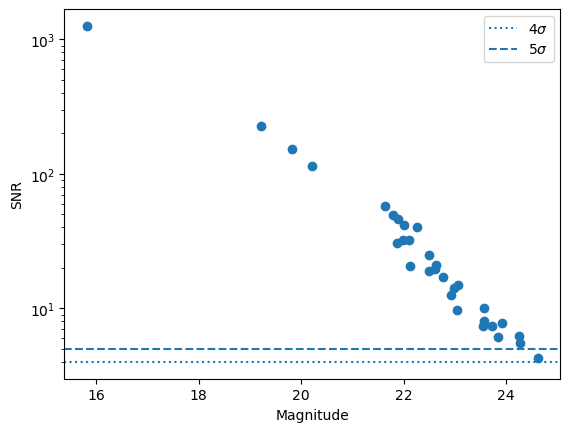

In [212]:
mag, snr_base, snr_diffim = zip(*magsnr)
plt.scatter(mag, snr_base)
plt.axhline(4, linestyle="dotted", label="$4 \\sigma$")
plt.axhline(5, linestyle="dashed", label="$5 \\sigma$")
plt.xlabel("Magnitude")
plt.ylabel("SNR")
plt.semilogy()
plt.legend()
plt.show()

## Correlations

Here we check correlations between the filters annotations and detections. First we isolate the annotated columns and the ids of the simulation which includes a correct detection.

In [213]:
annotation_columns = [a for a in results_df.columns if a.startswith("ann_")]

In [214]:
detected_ids = []
for i in results_df["id"].unique():
    _df = results_df[results_df["id"] == i]
    if not _df["ann_mask_injected"].any():
        continue
    detected_ids.append(i)

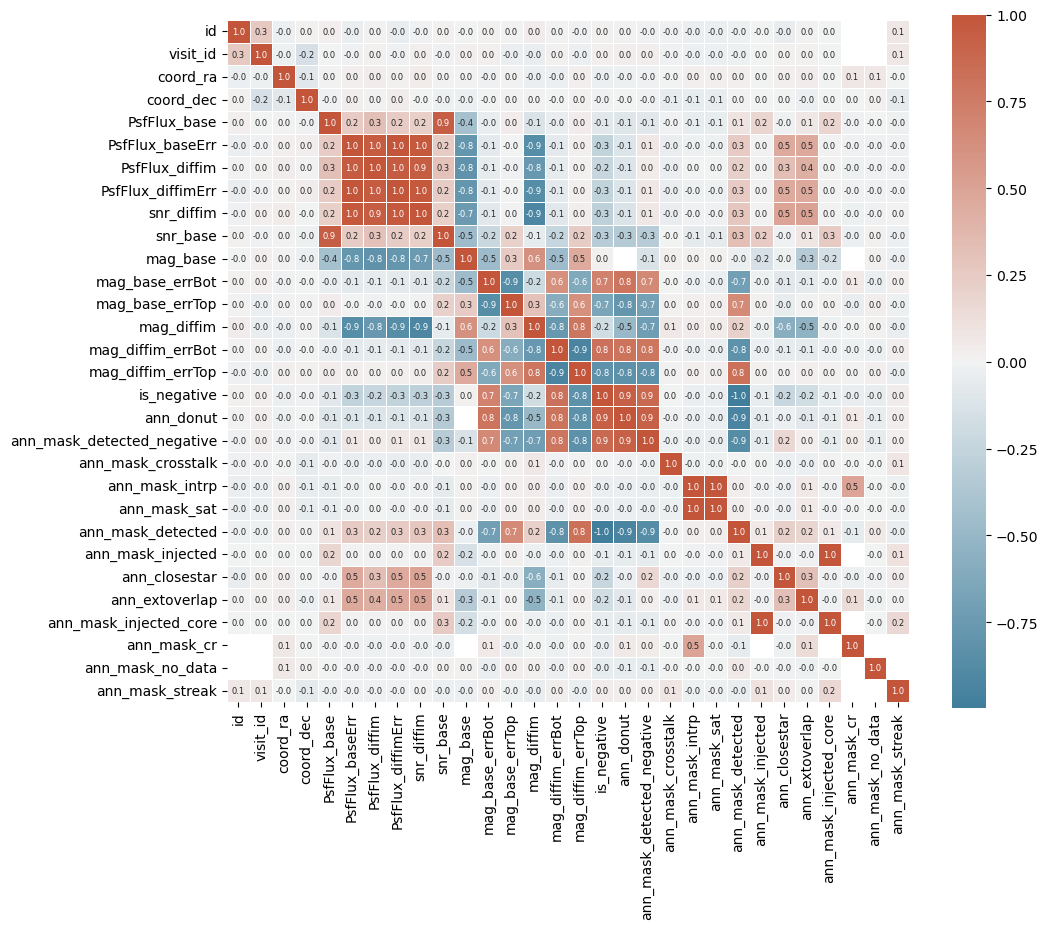

In [215]:
corr = results_df.astype(float).corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, square=True, annot=True, fmt=".1f", linewidths=.5, annot_kws={"fontsize": 6})
plt.show()

# Filtering pipeline

We try to apply the filtering logic over the 34 images.

In [270]:
_df = results_df[["is_negative"] + annotation_columns].fillna(0).astype(bool)

In [289]:
filtered_index = (
    (~_df["is_negative"]) &
    (~_df["ann_donut"]) & 
    (~_df["ann_mask_crosstalk"]) & 
    (~_df["ann_mask_sat"])  & 
    (~_df["ann_closestar"])  & 
    (~_df["ann_mask_cr"])  & 
    (~_df["ann_mask_streak"]) & 
    (~_df["ann_mask_no_data"])
)

In [290]:
results_filtered = results_df[filtered_index]
results_filtered_5s = results_filtered[results_filtered["snr_base"] > 5]

In [291]:
print(f"After filtering we end up with {results_filtered.shape[0]} positives, {len(results_filtered[results_filtered['ann_mask_injected'] == True])} of which are true positives")

After filtering we end up with 5431 positives, 29 of which are true positives


In [309]:
print(f"After filtering we end up with {results_filtered_5s.shape[0]} positives at 5sigma, {len(results_filtered_5s[results_filtered_5s["ann_mask_injected"] == True])} of which are true positives")

After filtering we end up with 398 positives at 5sigma, 28 of which are true positives


In [313]:
print(f"Applying filters we were able to reduce the 4sigma anomalies numbers by {100 * (len(results_filtered) - len(results_df)) / len(results_df):.2f} %")

Applying filters we were able to reduce the 4sigma anomalies numbers by -59.68 %


In [312]:
print(f"Applying filters we were able to reduce the 5sigma anomalies numbers by {100 * (len(results_filtered_5s) - len(results_df[results_df["snr_base"] > 5])) / len(results_df[results_df["snr_base"] > 5]):.2f} %")

Applying filters we were able to reduce the 5sigma anomalies numbers by -25.61 %
